In [1]:
import sys, os

In [2]:
print("executable:", sys.executable)

executable: C:\coding\leveraged-etf-simulator\.venv\Scripts\python.exe


In [3]:
print("cwd:", os.getcwd())

cwd: C:\coding\leveraged-etf-simulator\notebooks


In [4]:
import certifi, os

In [5]:
os.environ["SSL_CERT_FILE"] = certifi.where()

In [6]:
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()

In [7]:
import sys

In [8]:
from pathlib import Path

In [9]:
PROJECT_ROOT = Path().resolve().parent

In [10]:
sys.path.append(str(PROJECT_ROOT / "src"))

In [11]:
sys.executable

'C:\\coding\\leveraged-etf-simulator\\.venv\\Scripts\\python.exe'

In [12]:
from fetch_data import fetch_prices

In [13]:
prices = fetch_prices("AMD")

[*********************100%***********************]  1 of 1 completed


In [14]:
prices.head()

Price,Close,High,Low,Open,Volume
Ticker,AMD,AMD,AMD,AMD,AMD
Date,,,,,
2026-01-05,221.080002,234.020004,220.479996,230.250000,31941100
2026-01-06,214.350006,222.919998,211.250000,222.710007,40033200
2026-01-07,210.020004,212.130005,207.169998,212.130005,29715500
2026-01-08,204.679993,210.940002,203.330002,210.899994,27505000
2026-01-09,203.169998,207.300003,203.070007,205.720001,24217300


In [15]:
prices.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 22 entries, 2026-01-05 to 2026-02-04
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AMD)   22 non-null     float64
 1   (High, AMD)    22 non-null     float64
 2   (Low, AMD)     22 non-null     float64
 3   (Open, AMD)    22 non-null     float64
 4   (Volume, AMD)  22 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.0 KB


In [16]:
prices.columns = prices.columns.get_level_values(0)

In [17]:
prices.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2026-01-05,221.080002,234.020004,220.479996,230.250000,31941100
2026-01-06,214.350006,222.919998,211.250000,222.710007,40033200
2026-01-07,210.020004,212.130005,207.169998,212.130005,29715500
2026-01-08,204.679993,210.940002,203.330002,210.899994,27505000
2026-01-09,203.169998,207.300003,203.070007,205.720001,24217300


In [18]:
returns = prices["Close"].pct_change()

In [19]:
returns.head()

Date
2026-01-05         NaN
2026-01-06   -0.030441
2026-01-07   -0.020201
2026-01-08   -0.025426
2026-01-09   -0.007377
Name: Close, dtype: float64

In [20]:
leveraged_2x = returns * 2

In [21]:
leveraged_2x.head()

Date
2026-01-05         NaN
2026-01-06   -0.060883
2026-01-07   -0.040401
2026-01-08   -0.050852
2026-01-09   -0.014755
Name: Close, dtype: float64

In [22]:
cum_1x = (1+returns).cumprod()

In [23]:
cum_2x = (1+leveraged_2x).cumprod()

In [34]:
cum_1x.tail(), cum_2x.tail()

(Date
 2026-01-29    1.140673
 2026-01-30    1.070789
 2026-02-02    1.113941
 2026-02-03    1.095124
 2026-02-04    0.905509
 Name: Close, dtype: float64,
 Date
 2026-01-29    1.282976
 2026-01-30    1.125771
 2026-02-02    1.216506
 2026-02-03    1.175408
 2026-02-04    0.768377
 Name: Close, dtype: float64)

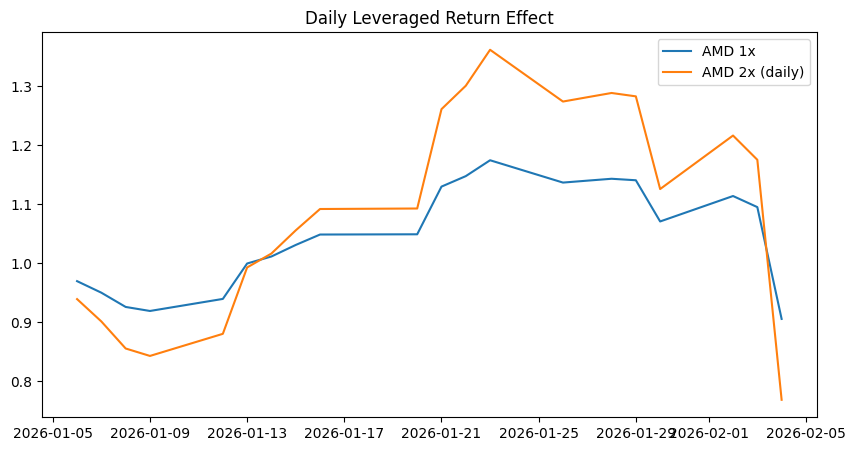

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(cum_1x.index, cum_1x, label="AMD 1x")
plt.plot(cum_2x.index, cum_2x, label="AMD 2x (daily)")

plt.legend()
plt.title("Daily Leveraged Return Effect")
plt.show()

In [38]:
print("1x last:", cum_1x.iloc[-1])
print("2x last:", cum_2x.iloc[-1])
print("3x last:", cum_3x.iloc[-1] if "cum_3x" in globals() else "no 3x yet")

1x last: 0.9055093214373496
2x last: 0.7683771342460894
3x last: no 3x yet


In [39]:
expected_2x = 1 + 2 * (cum_1x.iloc[-1] - 1)   # '누적수익률에 2배' 착각 버전
print("expected 2x (wrong idea):", expected_2x)
print("actual 2x (daily reset):", cum_2x.iloc[-1])

expected 2x (wrong idea): 0.8110186428746993
actual 2x (daily reset): 0.7683771342460894


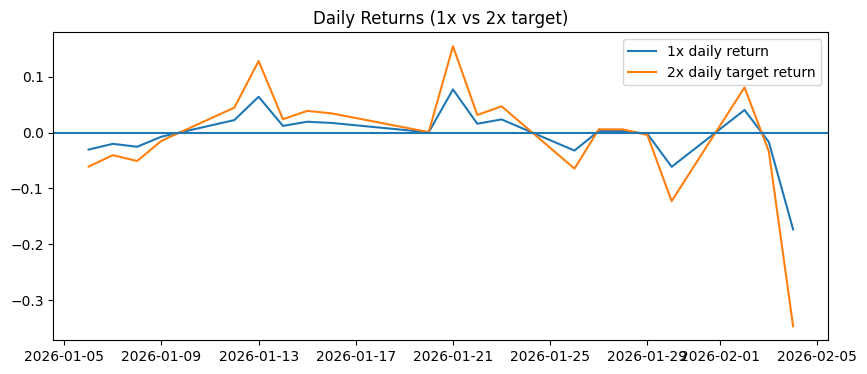

In [40]:
r1 = returns
r2 = returns * 2

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(r1.index, r1, label="1x daily return")
plt.plot(r2.index, r2, label="2x daily target return")
plt.axhline(0)
plt.legend()
plt.title("Daily Returns (1x vs 2x target)")
plt.show()